### Subgradient





#### Preliminalty
* $\mathbb{E}$：実数ベクトル空間
* $f: \mathbb{E} \rightarrow(-\infty, \infty]$：真の関数
* $x \in \operatorname{dom}(f)$：$f$の定義域に属するベクトル
* $\mathbb{E}^*$：実数ベクトル空間(但し、ノルムは双対ノルム$\|\cdot\|_{*}$である)
* $g \in \mathbb{E}^*$：$\mathbb{E}^*$に属するベクトル
* $\langle,\rangle$：ベクトルの内積
* 


#### 劣勾配,劣微分の定義
* ある関数のある点における微分(勾配)が成立するとき、その点について接線(接平面)が対応するわけですが、勾配を直接求めるわけではなく接平面を求めよう(近似しよう)とするのがこの物語のプロローグです。
* 何を使って近似するか、アフィン関数を使ってみましょう。アフィン関数とは、一次関数に定数項がついた"平行移動できる"線形関数です。アフィン関数を使って、ある関数$f$のある点$x$に接する接線(接平面)を近似しましょう。

* 接平面について、以下の条件を満たす場合、ベクトル$g \in \mathbb{E}^*$は$f$の$x$における**劣勾配**と呼ばれます。$g$はアフィン関数を構成するベクトルです。
$$
\begin{equation*}
f(\mathbf{y}) \geq f(\mathbf{x})+\langle\mathbf{g}, \mathbf{y}-\mathbf{x}\rangle \text { for all } \mathbf{y} \in \mathbb{E} \tag{3.1}
\end{equation*}
$$

* 幾何学的な直感として、$x$以外の点について、接平面(を近似するアフィン関数)が$f$の値よりも大きな値をとらないという意味です。例えば、二次関数のある点における接線は、接している点以外での接線の値は関数の値より同じか小さいはずです。
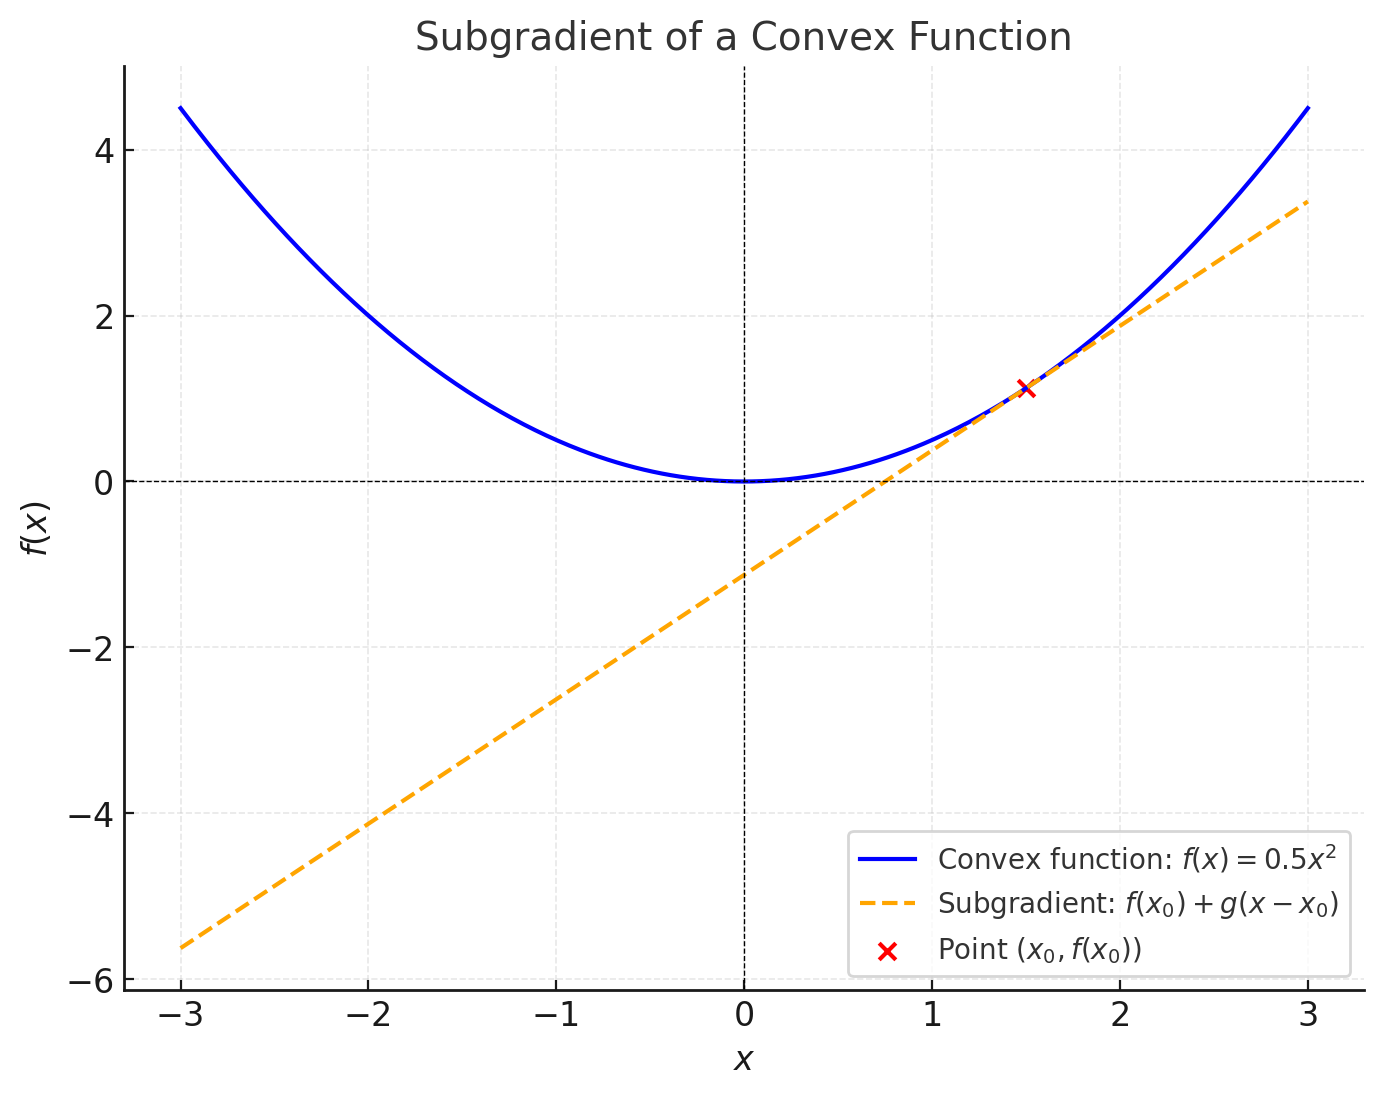

* $\mathbf{y} \notin \operatorname{dom}(f)$ に対しては自明：$f$の定義域以外の領域での関数と接平面の関係に興味がないため $\operatorname{dom}(f)$内の$y$だけを考えるように不等式を書きます。

$$
f(\mathbf{y}) \geq f(\mathbf{x})+\langle\mathbf{g}, \mathbf{y}-\mathbf{x}\rangle \text { for all } \mathbf{y} \in \operatorname{dom}(f)
$$

* $3.1$を満たす接平面(を表現する劣勾配)は複数の場合があります。図1において、接点を固定して接線をシーソーのように動かせば複数あるというのがわかると思います。

* 劣勾配の集合を**劣微分**といいます。定義は以下の通りです。$\partial f(\mathbf{x})$ と表現します。
$$
\partial f(\mathbf{x}) \equiv\left\{\mathbf{g} \in \mathbb{E}^{*}: f(\mathbf{y}) \geq f(\mathbf{x})+\langle\mathbf{g}, \mathbf{y}-\mathbf{x}\rangle \text { for all } \mathbf{y} \in \mathbb{E}\right\}
$$

##### 例示






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 函数 f(x) = ||x|| を定義 (Euclidean Norm)
def norm(x):
    return np.linalg.norm(x, ord=2)

# 双対ノルムを計算
def dual_norm(g):
    return np.linalg.norm(g, ord=2)

# 単位球を描画 (原点を中心とする半径1のノルムの球)
theta = np.linspace(0, 2 * np.pi, 100)
unit_ball_x = np.cos(theta)
unit_ball_y = np.sin(theta)

# 双対ノルム単位球
dual_unit_ball_x = np.cos(theta)
dual_unit_ball_y = np.sin(theta)

# 点 (x, y) の双対ノルムベクトルに対する内積チェック
x = np.array([1, 1])
dual_g = x / norm(x)  # 双対ノルムの単位ベクトル

# 描画
plt.figure(figsize=(8, 8))

# ノルムの単位球
plt.plot(unit_ball_x, unit_ball_y, label="Norm Unit Ball $||\\mathbf{y}|| \\leq 1$", color="blue")

# 双対ノルムの単位球
plt.plot(dual_unit_ball_x, dual_unit_ball_y, label="Dual Norm Unit Ball $||\\mathbf{g}||_* \\leq 1$", color="orange", linestyle="--")

# 双対ノルム内のベクトルを描画
plt.quiver(0, 0, dual_g[0], dual_g[1], angles="xy", scale_units="xy", scale=1, color="red", label="$\\mathbf{g}$ in Dual Norm Unit Ball")

# グラフ設定
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.title("Norm and Dual Norm Unit Balls", fontsize=14)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.axis("equal")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


#### 劣微分の性質